In [2]:
from IPython.display import HTML, Image, YouTubeVideo

# MSDS688 -- Artifical Intelligence

## Week 8 - Boosting

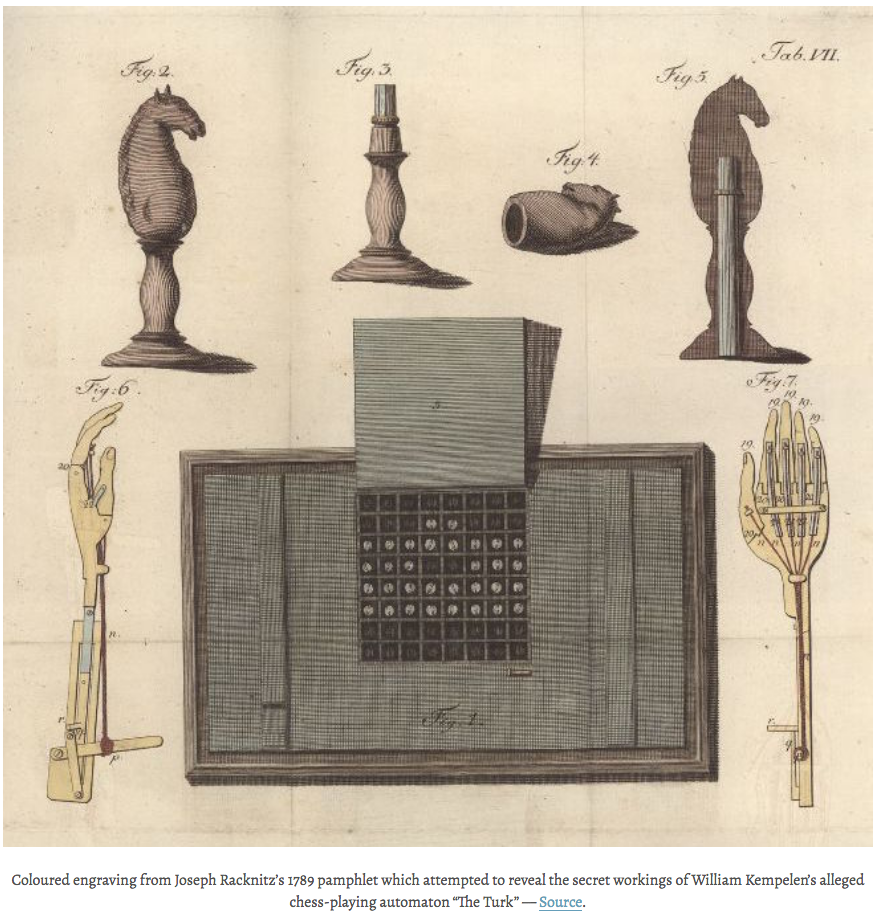

In [3]:
Image('images/kempelens-chess-playing-turk.png')

Kempelen was famous for the chess-playing Turk he had created. This life-sized model was exhibited all over Europe and America by Kempelen himself and then by others until its demise in a fire in 1854; in the course of its long career, reportedly beating both Napoleon and Charles Babbage. Although aspects of its movement — the motion of the arms, head, etc. — were mechanical, it was not, of course, a full automaton. The crucial chess-playing aspect was the work of a succession of skillful and diminutive human chess players concealed in its pedestal, something all but admitted by Kempelen, who said his main achievement had been to create an illusion. People no doubt knew it was a hoax, but they were fascinated anyway, because it dramatized the question of the age: whether a machine could reason, and relatedly, whether the human mind might itself be a kind of machine.

Edgar Allan Poe was taken by the question and in 1836 wrote an essay about Kempelen’s Turk and Babbage’s Difference Engine. He believed a machine could calculate, because calculation was a fixed and determinate process, but not that a machine could play chess because, he said, chess was indeterminate: the machine would have to respond to its opponent’s moves. So Babbage’s machine was genuine but Kempelen’s fraudulent.

Cite: Riskin, J. (n.d.). Frolicsome Engines: The Long Prehistory of Artificial Intelligence. Retrieved April 10, 2018, from [https://publicdomainreview.org/2016/05/04/frolicsome-engines-the-long-prehistory-of-artificial-intelligence/](https://publicdomainreview.org/2016/05/04/frolicsome-engines-the-long-prehistory-of-artificial-intelligence/)

# Review - Concepts and techniques

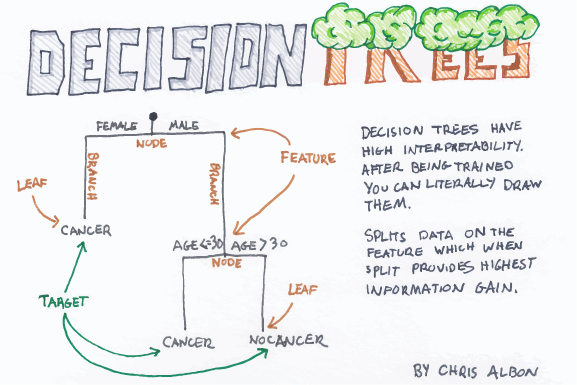

In [4]:
Image('images/Decision_Trees_web.png')

## Entropy and information gain

$$
\large
\text{Entropy:} \;
H(V) = \sum_{k} P(v_k) \log_{2} \left( \frac{1}{P(v_k)} \right) = - \sum_{k} P(v_k) \log_{2} P(v_k)\\
\begin{align}
&V \;\text{random variable}\\
&P \; \text{probability}
\newline
\end{align}
$$

$$
\large
\text{Information Gain:} \; 
IG(S, C) = H(S) - \sum_{k} \frac{\aleph\left({C_i}\right)}{\aleph\left({S}\right)} \log_{2} H(C_i) \\
\begin{align}
&S \; \text{parent node}\\
&C_i \; \text{ith child node}\\
&IG(S, C) \; \text{entropy gain from split}\\
&H(S) \; \text{entropy of }S\\
&H(C_i) \; \text{entropy of } C_i\\
&\aleph\left({C_i}\right) \; \text{number of elements in } C_i\\
&\aleph\left({S}\right) \; \text{number of elements in } S
\end{align}
$$

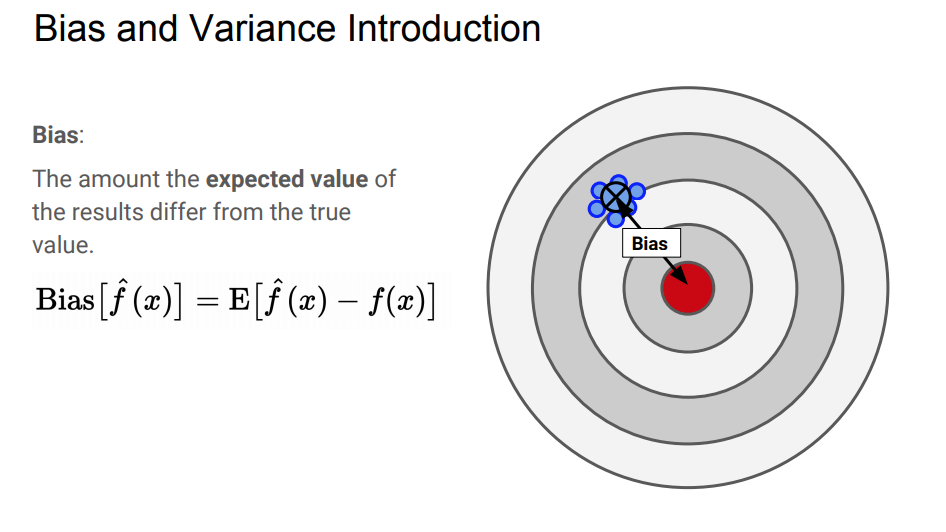

In [8]:
Image('images/bias-equation.png')

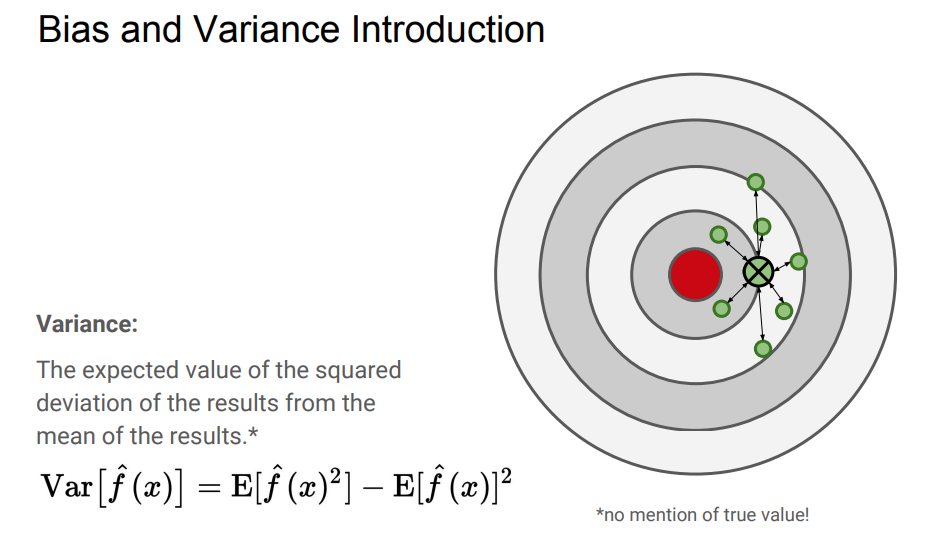

In [9]:
Image('images/variance-equation.png')

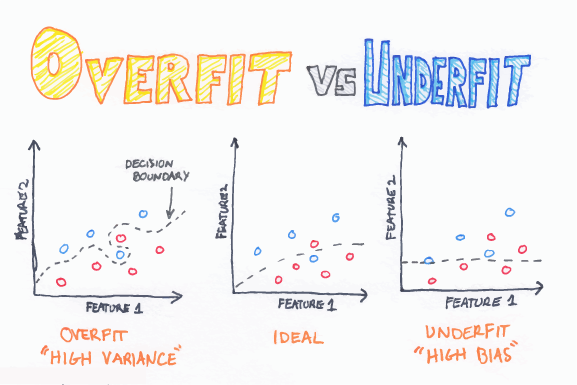

In [6]:
Image('images/Overfit_Vs_Underfit_web.png')

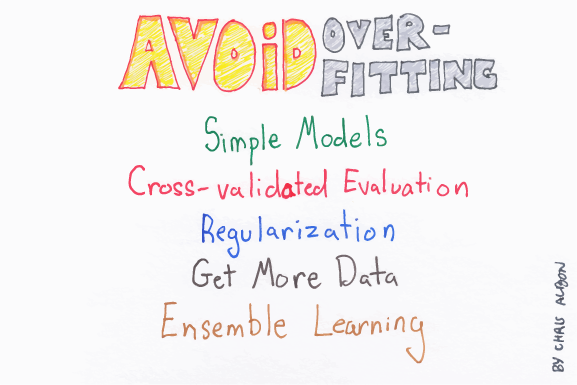

In [7]:
Image('images/Avoid_Overfitting_web.png')

## Decision trees models in Scikit-Learn

In [15]:
# load the breast cancer data set
# see: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
from sklearn import datasets
data = datasets.load_breast_cancer()

In [16]:
print('Class labels:', np.unique(data.target_names))

Class labels: ['benign' 'malignant']


In [17]:
print('Feature names:', data.feature_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
# splits and loads data as numpy arrays
X, y = datasets.load_breast_cancer(return_X_y=True)

In [19]:
# create our training and testing data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [20]:
# scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Building an Scikit-Learn DecisionTreeClassifier

Check out the excellent documentation of the Scikit-Learn project
[DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [25]:
# build the tree
TREE_FILENAME = 'tree-samples-4.png'
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=4, 
                              random_state=37)

# fit the data 
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')

In [26]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=data.target_names,
                           feature_names=data.feature_names,
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png(TREE_FILENAME) 

True

In [27]:
from IPython.display import Image
%matplotlib inline

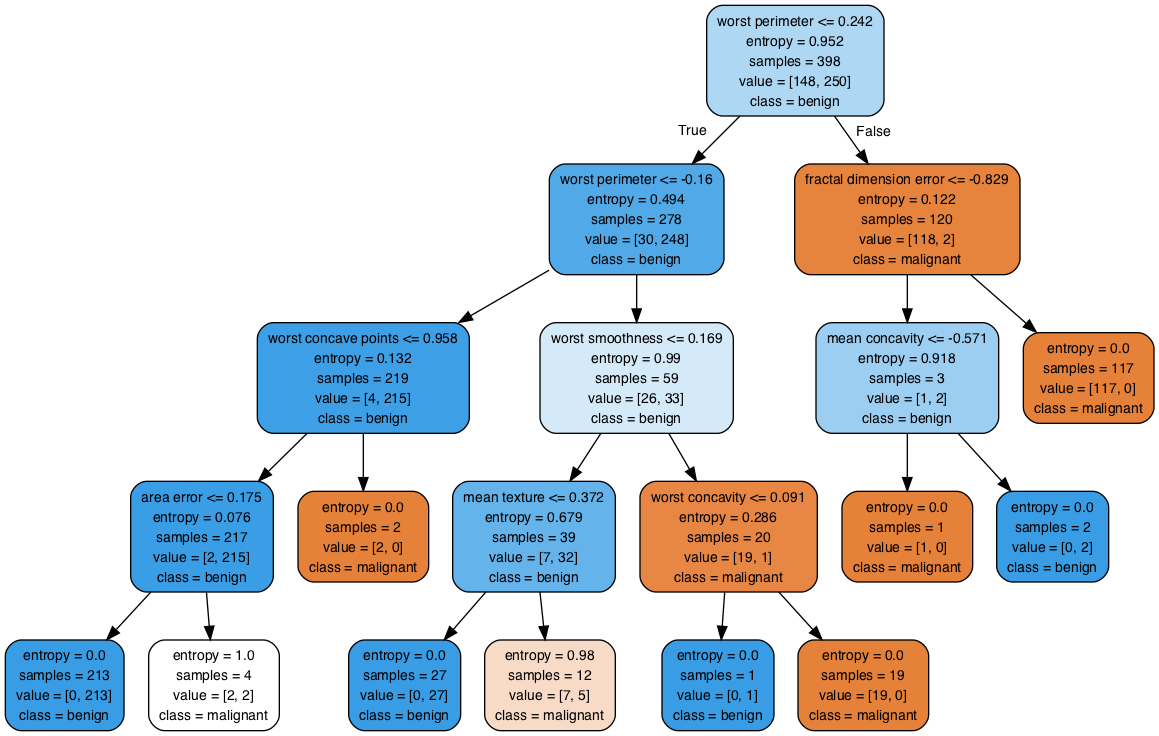

In [28]:
Image(filename=TREE_FILENAME, width=900) 

### Cross-validation and model performance

In [30]:
from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier(criterion='entropy', 
                              min_samples_leaf=4, 
                              random_state=37)
scores = cross_val_score(tree, data.data, data.target, cv=5)
# f-strings are awesome
print(f'{scores.min():.2f}, {scores.mean():.2f}, {scores.max():.2f}')

0.93, 0.95, 0.96


# Quiz / Exercise

# Lecture

_Note: Start with a promise_ 

## Learning Objectives

1. Select models that do not perform well, remove them from consideration and those that are left are good-enough or _probably approximately correct_.

1. Explain how neural network functions including the neurons, activation function, weights, forward propagation and back propagation.

1. Summarize the relationship between the number of features in a model and the density of data points. 

1. Illustrate how boosting improves the performance of decision trees through the use of weak learners and decision stumps.


## Key Concepts

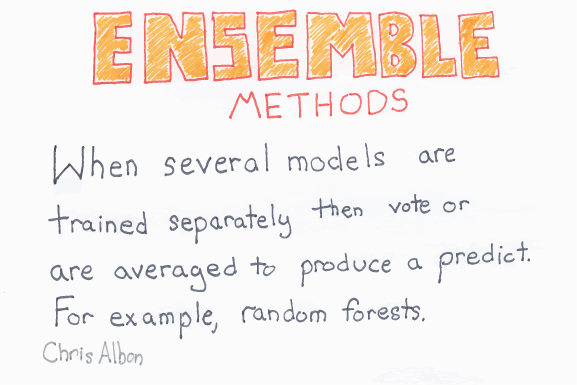

In [8]:
Image('images/Ensemble_Methods_web.png')

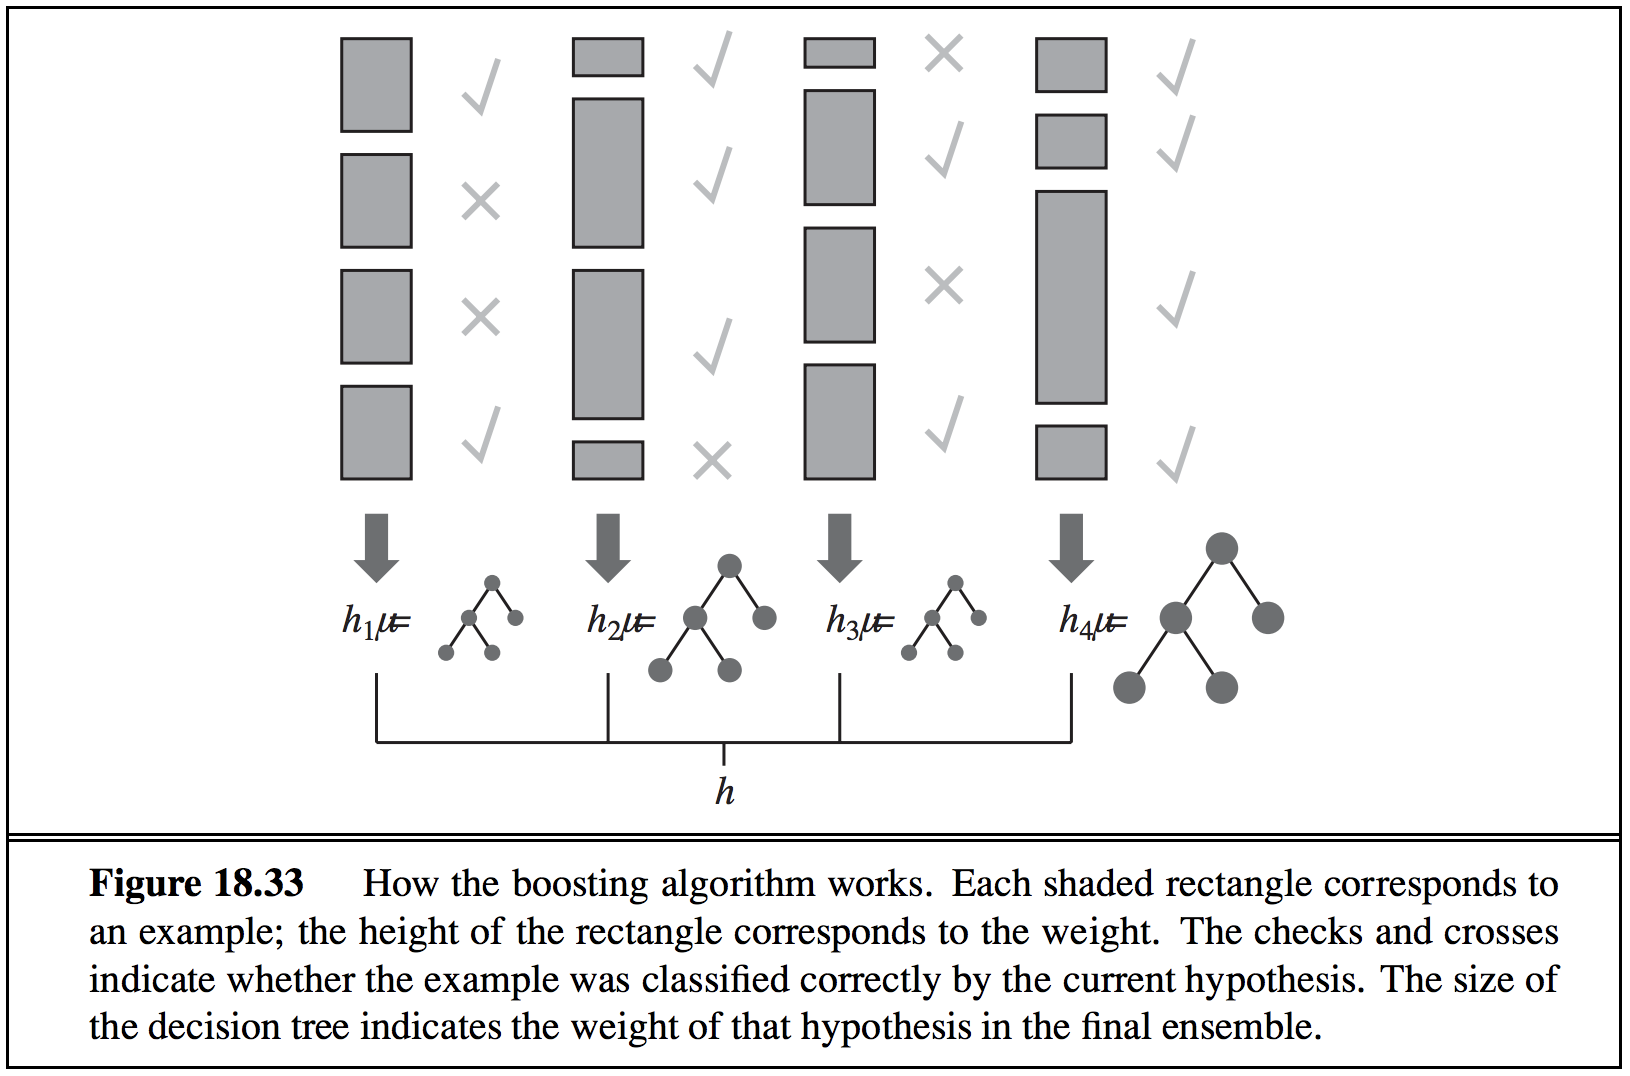

In [3]:
Image('images/')

## Random forests

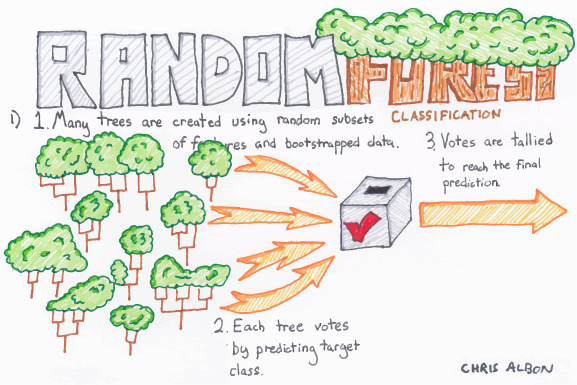

In [9]:
Image('images/Random_Forest_web.png')

## Is the random forsest model better?

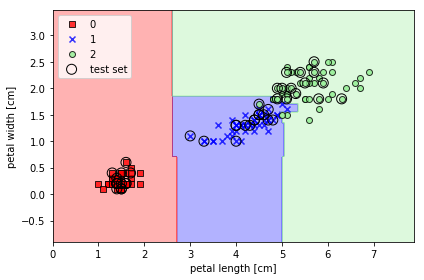

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()

## Boosting

1. Boosting is the most widely used ensamble method

2. An ensamble method produce a strong learner by combining results of many weak learners
    - Random forests combine many decision tree stumps
    - Boosting is combines any kind of weak models into a strong one
    - In other words, boosing is not specific to decision trees

3. Error rates are used to classify learners
    - Strong learners approach 0
    - Weak learners are less than 0.5 (i.e., slightly better than guessing

4. Weights are increased on samples that are poorly classified

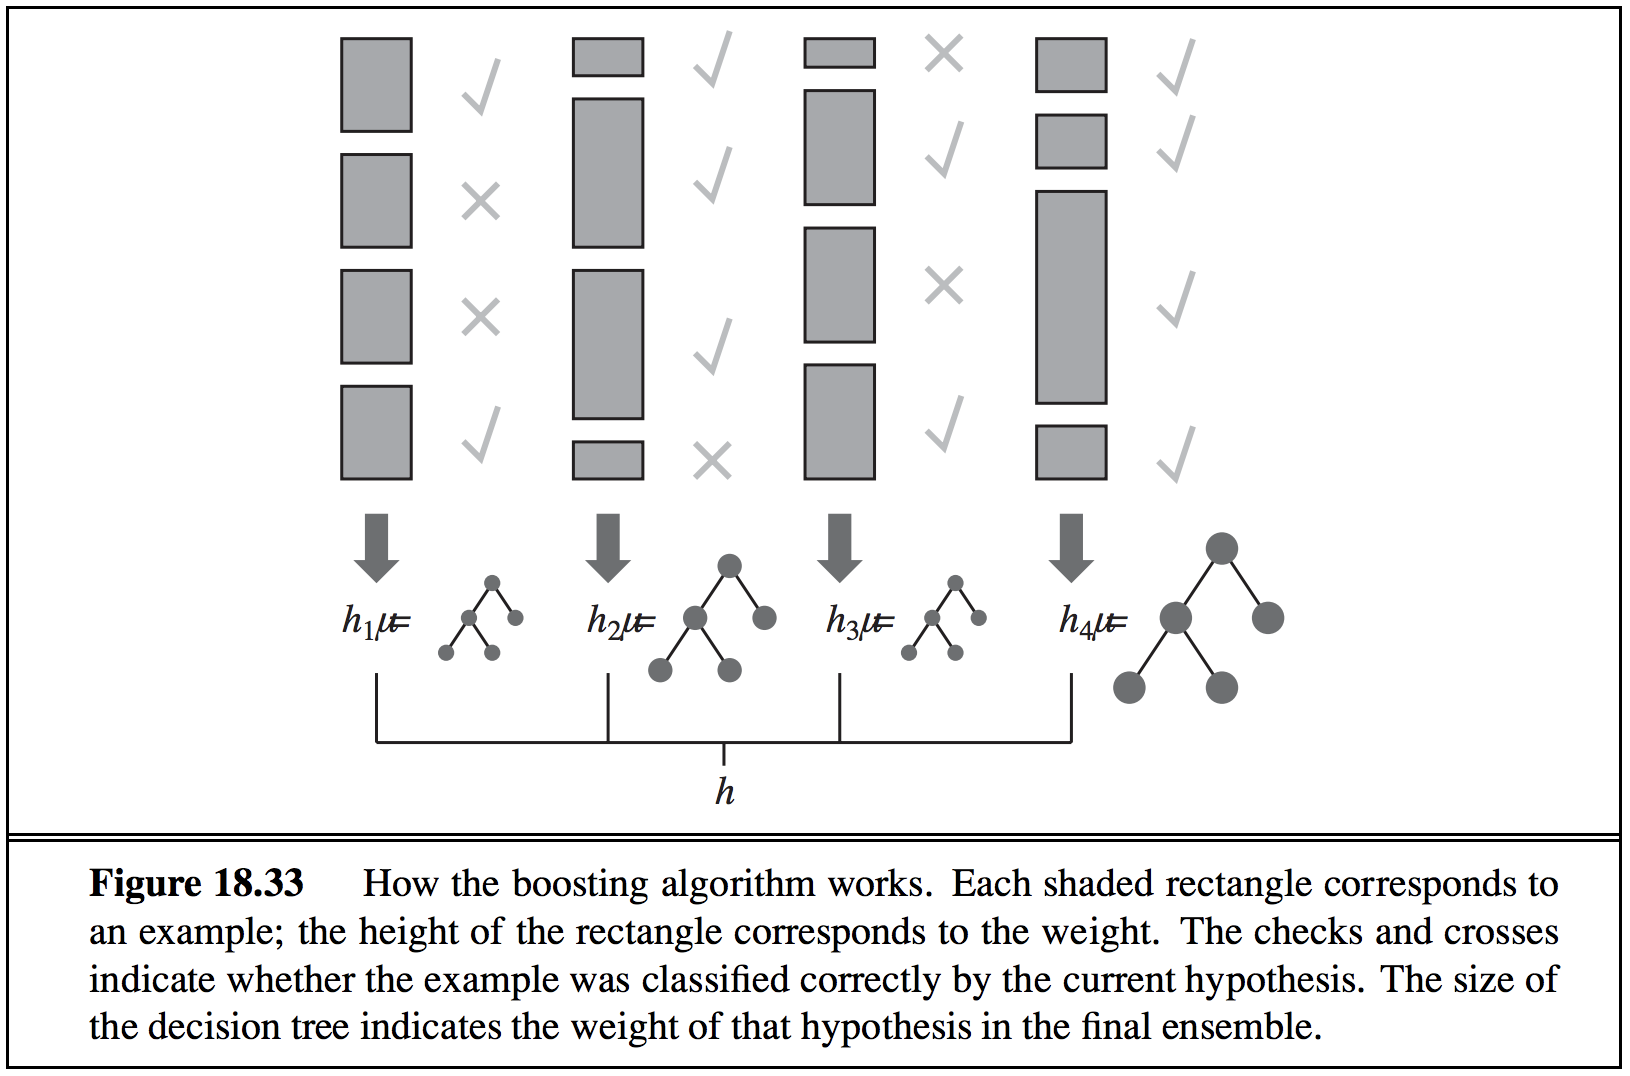

In [3]:
Image('images/Figure-S18-33-boosting.png')

# Citations

1. Flashcards: Albon, C. (2018, March 21). Chrisalbon/MachineLearningFlashcards.com. Retrieved August 19, 2018, from https://github.com/chrisalbon/MachineLearningFlashcards.com
The website for the machine learning flashcards project.

2. Textbook figures: Stuart Russel and Peter Norvig. _Artificial Intelligence: A Modern Approach_ (3rd ed). Prentice-Hall. 2010. Chapter 18 - Learning from Examples. pp 693-757.

# Break 

![]()

In [ ]:
## Boosting

# Demonstration

# Exercise

_Note: End with humor_